# Librerías

Se importan las librerías a usar:

**numpy** para el manejo de vectores y matrices

**pandas** para el manejo  de tablas

**stats** de **scipy** para el análisis estadístico

**matplotlib** y **seaborn** para las gráficas

**skearln** para entrenar los modelos de regresión

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Carga de datos

In [2]:
datos = pd.read_csv('/content/Encuensta_consumo_energetico.csv', sep = ';', decimal = ',')

In [3]:
datos.head()

,T °C,Estrato,Consumo (kWh),,.1
0,12.00,3,104,NaN,NaN
1,12.24,5,112,NaN,NaN
2,12.48,2,107,NaN,NaN
3,12.72,4,113,NaN,NaN
4,12.96,5,122,NaN,NaN


# Análisis de datos

Se divide en el análisis de la calidad de los datos y en el análisis exploratorio.

## Calidad de los datos

Se verifica que se cumpla con los criterios de *validez de los datos*, *completitud*, *duplicidad*, *integridad* y *presición*.

### 1. Validez de los datos

Hace referencia a:

* Tipo de datos y la coherencia de cada uno de ellos, para este caso, para las variables de la temperatura y de consumo, los valores deben ser numéricos.

* Cantidad de digitos y de decimales. En este caso, la temepratura debe ser del tipo décimal (flotante o float) y el consumo del tipo entero.

In [4]:
datos.dtypes

,0
T °C,float64
Estrato,int64
Consumo (kWh),int64
,float64
.1,float64


Con esto se verifica la coherenica de los datos

In [10]:
def Cant_dec(lista):
  try:
    list_cant_dec = [len(str(i).split('.')[1]) for i in lista]
    list_cant_dec = pd.DataFrame({'list_cant_dec':list_cant_dec})
    return(list_cant_dec.value_counts())
  except:
    return('Sus valores no tienen cifras decimales')

In [12]:
print(
    Cant_dec(datos['T °C']),
    f'Para la variable Estrato, {Cant_dec(datos["Estrato"])}',
    f'Para la variable Consumo, {Cant_dec(datos["Consumo (kWh)"])} ',
    sep = '\n'
)

list_cant_dec
2                80
1                20
Name: count, dtype: int64
Para la variable Estrato, Sus valores no tienen cifras decimales
Para la variable Consumo, Sus valores no tienen cifras decimales 


Con esto se comprueba la validez de los datos

# 2. Completitud

La completitud implica que no debe existir registros nulos. Como los datos fueron hechos y no tomados de alguna situación real, entonces sabemos que se cumple con la completiud, sin embargo, se procede a hacer la verificación como si no estuviesemos seguros del cumplimiento de este criterio.

In [15]:
datos.isnull().sum()

,0
T °C,0
Estrato,0
Consumo (kWh),0
,100
.1,100


In [20]:
datos = datos[datos.columns[:3]]

In [19]:
# datos.drop(columns = datos.columns[3:], inplace = True)

In [22]:
# datos = datos.iloc[:,:3]

In [23]:
datos.head()

,T °C,Estrato,Consumo (kWh)
0,12.00,3,104
1,12.24,5,112
2,12.48,2,107
3,12.72,4,113
4,12.96,5,122


In [24]:
datos.isnull().sum()

,0
T °C,0
Estrato,0
Consumo (kWh),0


Los datos ya cumplen con el criterio de la completitud

# 3. Duplicidad

Los registros deben ser únicos, lo que normalmente se verifica con el ID de cada registro. Pero se puede comparar todas las filas (registros).

In [27]:
print(f'El dataset tiene {datos.duplicated().sum()} regitros duplicados')

El dataset tiene 0 regitros duplicados


Se  verificó que los registros no se encuentran duplicados

# 4. Integridad

Se debe garantizar la consistencia entre distintas columna. En este caso, implica que a medida que aumenta la temepratura aumenta el consumo, al menos se debe ver ese comportamiento como una tendencia y no una regla.

Para no adelantarnos al modelo lineal, aquí me limitare a hacer una gráfica de dispersión.

In [28]:
datos.columns = ['T (°C)', 'Estrato', 'Consumo (kWh)']

In [29]:
colores = colors= ['#ff006eaa','#3a86ffaa','#1dd3b0aa','#fb5607aa','#ffbe0baa']

In [30]:
def tema(xlabel = None, ylabel = None, titulo = None):
    ax.spines['right'].set_visible(False),
    ax.spines['top'].set_visible(False),
    ax.spines['bottom'].set_visible(False),
    ax.spines['left'].set_visible(False),
    ax.set_facecolor('#ccccdd'),
    plt.grid(color='#ffffff', linewidth=0.4)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(titulo)

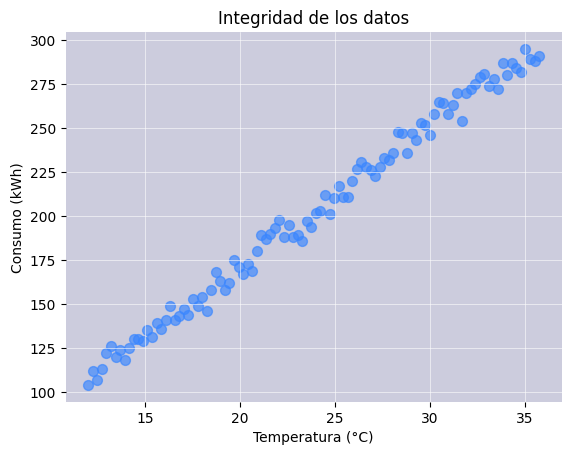

In [31]:
fig, ax = plt.subplots()
ax.scatter(datos['T (°C)'],  datos['Consumo (kWh)'], color = colores[1], s = 50)
tema('Temperatura (°C)', 'Consumo (kWh)', 'Integridad de los datos')
plt.show()

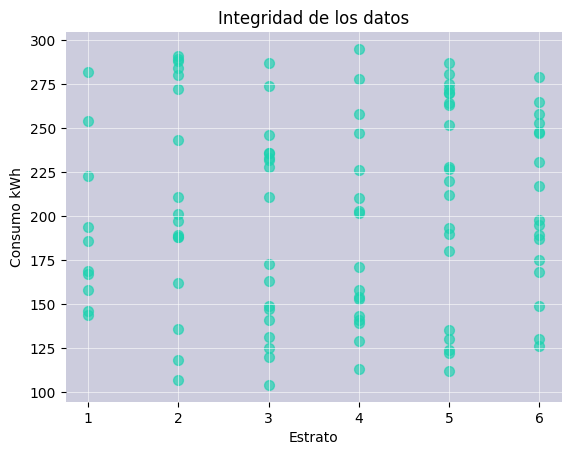

In [34]:
fig, ax = plt.subplots()
ax.scatter(datos['Estrato'],  datos['Consumo (kWh)'], color = colores[2], s = 50)
tema('Estrato', 'Consumo kWh', 'Integridad de los datos')
plt.show()

Se comprueba que los datos han conservado la integridad. El componente aleatorio que se introdujo al crear el dataset no afectó el cumplimineto de este criterio.

# 5. Presición

En este caso, podemos analizar la precisión buscando datos atípicos.

In [35]:
datos.head()

,T (°C),Estrato,Consumo (kWh)
0,12.00,3,104
1,12.24,5,112
2,12.48,2,107
3,12.72,4,113
4,12.96,5,122


<ipython-input-36-423cd7595fbf>:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bplot = ax.boxplot(x, patch_artist=True, labels = datos.columns)


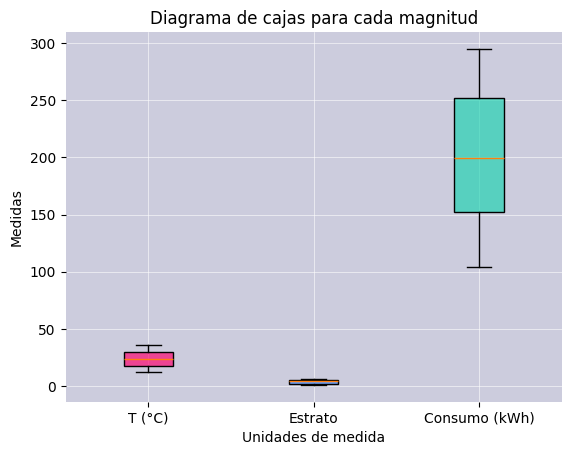

In [36]:
x = [datos[i].to_list() for i in datos.columns]

fig, ax = plt.subplots()
bplot = ax.boxplot(x, patch_artist=True, labels = datos.columns)
tema('Unidades de medida', 'Medidas', 'Diagrama de cajas para cada magnitud')
for patch, color in zip(bplot['boxes'], colores[:3]):
    patch.set_facecolor(color)
plt.show()

No se identificaron datos átipicos. En general, el dataset cumple con los cirterios de calidad. Se procede hacer el análisis exploratorio.

## Análisis exploratorio

In [38]:
datos.corr()

,T (°C),Estrato,Consumo (kWh)
T (°C),1.000000,-0.027730,0.995628
Estrato,-0.027730,1.000000,0.057171
Consumo (kWh),0.995628,0.057171,1.000000


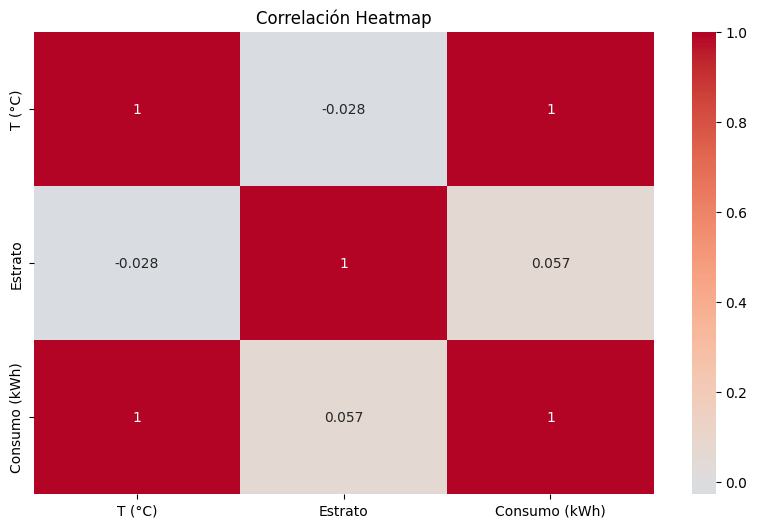

In [39]:
plt.figure(figsize=(10, 6))
sns.heatmap(datos.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlación Heatmap')
plt.show()

De este Heatmap de correlación se establece que existe una fuerte correlación positiva entre la temperatura y el consumo de energía eléctrica, por lo que se utilizará a la temperatura como la variable regresora para el consumo como variable respues en un modelo de regresión lineal simple.

# Modelo de aprendizaje automático

Se utilizará el modelo de regresión lineal simple teniendo como variable regresora a la temperatura media mensual y a la variable respuesta al consumo medio mensual.

Se establece los vectores que se utilizarán para el modelo.

In [40]:
X = np.array(datos['T (°C)'].to_list()).reshape(-1,1)
y = np.array(datos['Consumo (kWh)'].to_list()).reshape(-1,1)

Se escoge los datos de entrenamiento y de testeo, separando el 20 % de los datos para el testeo.

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [70]:
print(f'Los datos de entenamiento, de la variable regresora, representa el {len(X_train)} % de las temperaturas')
print(f'Los datos de entenamiento, de la variable respuesta, representa el {len(y_train)} % de los consumos')
print(f'Los datos de testeo, de la variable regresora, representa el {len(X_test)} % de las temperaturas')
print(f'Los datos de testeo, de la variable respuesta, representa el {len(y_test)} % de los consumos')

Los datos de entenamiento, de la variable regresora, representa el 80 % de las temperaturas
Los datos de entenamiento, de la variable respuesta, representa el 80 % de los consumos
Los datos de testeo, de la variable regresora, representa el 20 % de las temperaturas
Los datos de testeo, de la variable respuesta, representa el 20 % de los consumos


Se inicia la clase ``LinearRegression`` y se especifica que nos gustaría que nuestro modelo tenga el hiperparámetro $b_{intercepto}$ (``fit_intercept``):

In [71]:
lr = LinearRegression(fit_intercept = True)
lr.fit(X_train, y_train)

LinearRegression()

In [72]:
print(
    f'El valor del coeficiente de la variable temperatura es de {lr.coef_[0][0]}',
    f'El valor del término independiente es de {lr.intercept_}',
    sep = '\n'
    )

El valor del coeficiente de la variable temperatura es de 7.979116983886532
El valor del término independiente es de [11.91495133]


Predecimos sobre los datos de train y de test.

In [73]:
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

Se ven los parametros del modelo.

In [74]:
print('Error en datos de entrenamiento:', mean_squared_error(y_train, y_train_pred))
print('Error en datos de testeo:', mean_squared_error(y_test, y_test_pred))

Error en datos de entrenamiento: 25.904405194006564
Error en datos de testeo: 31.17570066730702


Se procede a graficar los datos obtenidos.

In [75]:
sns.set()

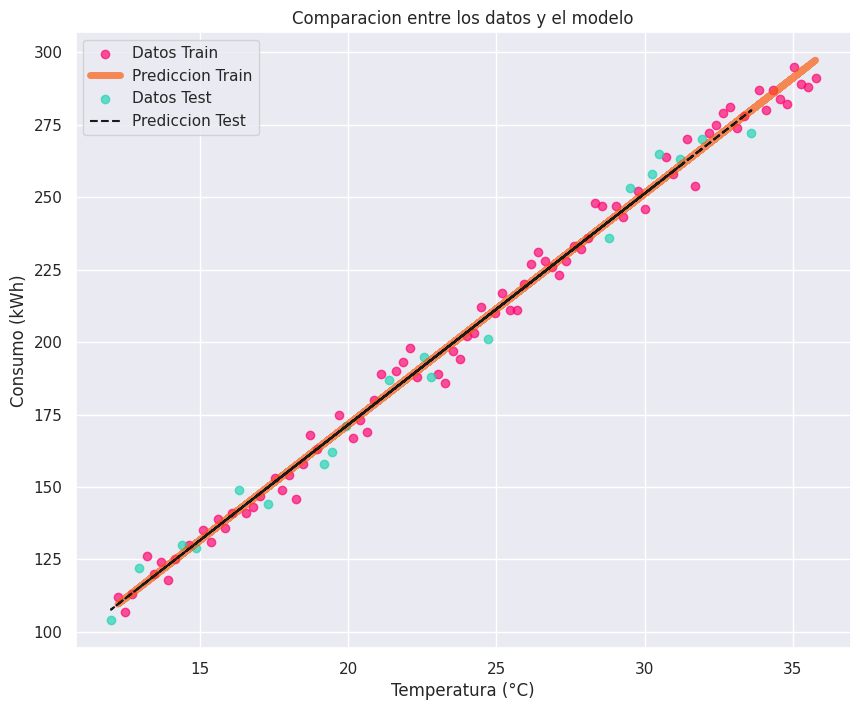

In [76]:
plt.figure(figsize = (10,8))

plt.scatter(X_train, y_train,  color=colores[0], label = 'Datos Train')
plt.plot(X_train, y_train_pred, color=colores[3], linewidth=5.0, label = 'Prediccion Train')

plt.scatter(X_test, y_test,  color=colores[2], label = 'Datos Test')
plt.plot(X_test, y_test_pred, color='k', linestyle = '--', label = 'Prediccion Test')

plt.legend()

plt.xlabel('Temperatura (°C)')
plt.ylabel('Consumo (kWh)')
plt.title('Comparacion entre los datos y el modelo')

plt.show()

Se realizan predicciones.

In [81]:
def pred_consumo(temperartura):
  return(round(lr.predict([[temperartura]])[0][0],2))

In [83]:
temperatura = 7
print(f'Para una temperatura de {temperatura} °C, el consmuo esperado es de {pred_consumo(temperatura)} kWh al mes')

Para una temperatura de 7 °C, el consmuo esperado es de 67.77 kWh al mes
